<a href="https://colab.research.google.com/github/astrd/TFM/blob/main/TFM_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# v2




## Carga de Datos

### Datos Meteostat

In [ ]:

!pip install meteostat


In [ ]:
import meteostat
from datetime import datetime
from meteostat import Point, Daily

# Set time period
start = datetime(2014, 1, 1)
end = datetime(2023, 12, 31)
# Create Point for  alemania berlin
berlin = Point(52.52, 13.404, 36)
# Get daily data for 2022
data = Daily(berlin, start, end)
weather_data = data.fetch()
# Display the data
# Rename the time column to date
weather_data.reset_index(inplace=True)
weather_data = weather_data.rename(columns={'time': 'Date'})
weather_data = weather_data.fillna(0)
print(weather_data)


           Date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0    2014-01-01   1.2  -0.9   4.1   0.0   0.0  162.0  11.2  25.9  1013.5   
1    2014-01-02   4.0   0.8   6.9   0.3   0.0  156.0  13.7  29.5  1007.0   
2    2014-01-03   6.6   2.7   9.3   0.0   0.0  188.0  11.9  44.6  1008.9   
3    2014-01-04   6.5   4.9   8.8   0.0   0.0  162.0  12.2  32.8  1008.0   
4    2014-01-05   5.6   2.4   7.7   0.5   0.0  217.0  10.4  27.0  1005.2   
...         ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
3635 2023-12-15   0.8  -0.3   1.7   0.0   0.0  272.0  11.3  24.1  1028.1   
3636 2023-12-16   3.4   1.3   5.2   0.0   0.0  256.0  13.2  27.8  1033.4   
3637 2023-12-17   5.8   4.4   7.1   0.0   0.0  253.0  15.9  35.2  1030.8   
3638 2023-12-18   6.8   6.2   8.0   0.0   0.0  255.0  16.7  35.2  1027.4   
3639 2023-12-19   6.1   5.4   6.9   0.0   0.0  249.0  16.7  33.3  1025.2   

       tsun  
0      18.0  
1       6.0  
2     228.0  
3      72.0  
4       0.0  
...

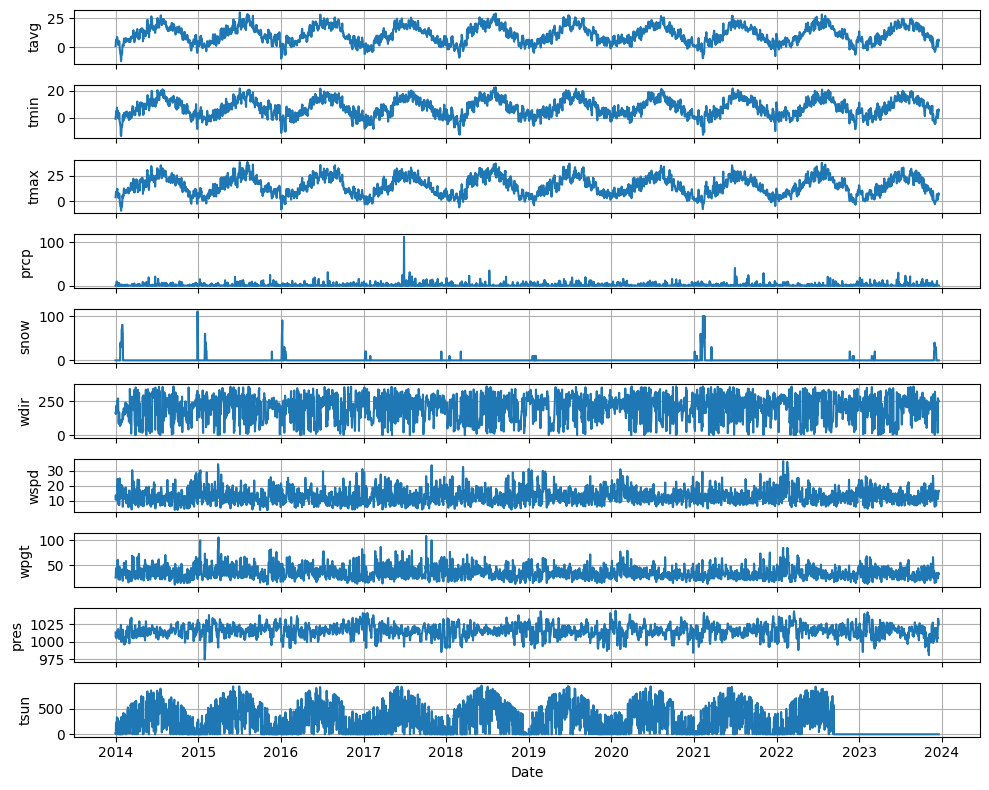

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = weather_data.select_dtypes(include='number').columns

# Crear una figura con subtramas para cada columna numérica
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 8), sharex=True)

# Graficar cada columna numérica en su subtrama correspondiente
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    ax.plot(weather_data['Date'], weather_data[col], linestyle='-', label=col)
    ax.set_ylabel(col)
    ax.grid(True)

    # Ajustes adicionales para la última subtrama
    if i == len(numeric_columns) - 1:
        ax.set_xlabel('Date')

# Ajustar el espaciado entre subtramas para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()

---------



### Energía Consumida

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

file_name = 'nrger.csv'
datanrg = pd.read_csv(file_name)



Saving nrger.csv to nrger.csv


In [ ]:
datanrg = datanrg[['TIME_PERIOD', 'OBS_VALUE']]
datanrg.columns.values[1] = "Energy"
datanrg.columns.values[0] = "Date"


In [ ]:
# quitar outliers
datanrg['Date'] = pd.to_datetime(datanrg['Date'])
datanrg['Energy'] = pd.to_numeric(datanrg['Energy'], errors='coerce')
datanrg.dropna(subset=['Energy'], inplace=True)


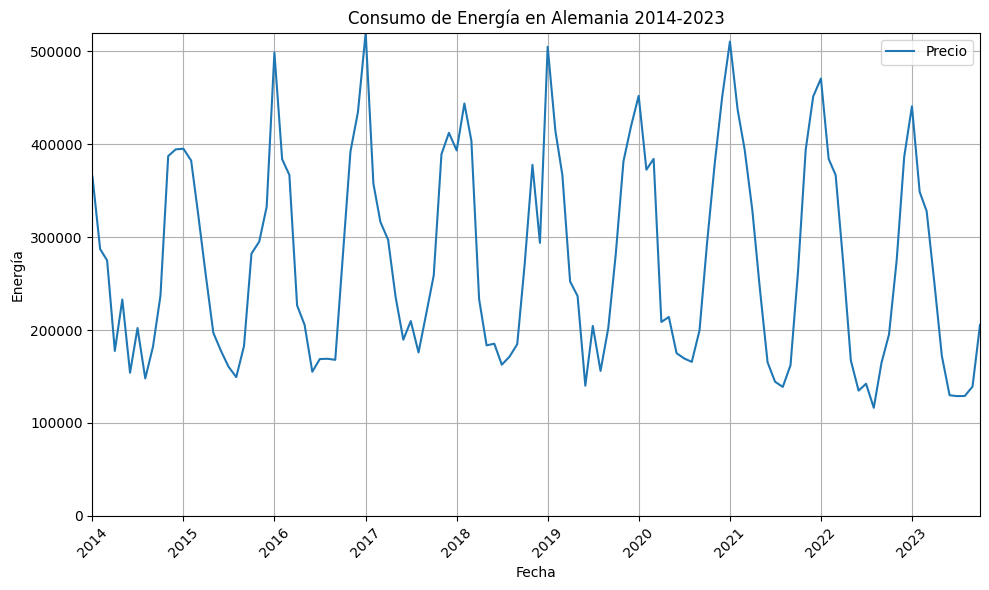

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(datanrg['Date'], datanrg['Energy'], label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Energía')
plt.title('Consumo de Energía en Alemania 2014-2023')

# Set x-axis limits starting from 2014
plt.xlim(pd.Timestamp('2014-01-01'), datanrg['Date'].max())

# Set y-axis lower limit to 0
plt.ylim(0, datanrg['Energy'].max())  # Change 'Energy' to the appropriate column if needed

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

datanrg['Date'] = pd.to_datetime(datanrg['Date'], errors='coerce')
datanrg.set_index('Date', inplace=True)
datanrg = datanrg.resample('D').ffill()

### Precio Gas Natural


In [ ]:
from google.colab import files

import pandas as pd
import io
uploaded = files.upload()

file_name = 'gasprice.csv'
datag = pd.read_csv(file_name)



Saving gasprice.csv to gasprice.csv


In [ ]:
datag.columns.values[0] = "Date"
datag.columns.values[1] = "Price"


In [ ]:
# Conversion date formato datetime
datag['Date'] = pd.to_datetime(datag['Date'])
datag['Price'] = pd.to_numeric(datag['Price'], errors='coerce')
datag.dropna(subset=['Price'], inplace=True)

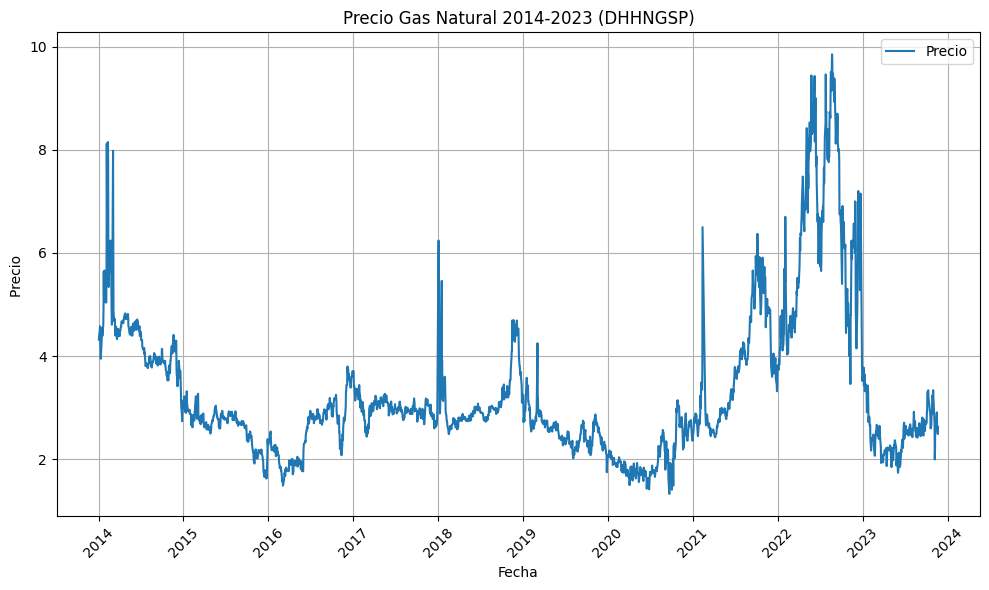

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(datag['Date'], datag['Price'], label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio ')
plt.title('Precio Gas Natural 2014-2023 (DHHNGSP)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
9272447e-81e2-4714-82d7-19c070ed2074

### Sentimiento Noticias

In [ ]:
from datetime import timedelta
import requests
import pandas as pd
import requests
from datetime import datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
def fetch_articles():
    url = "https://content.guardianapis.com/search"
    articles = []
    for year in range(2014, datetime.now().year + 1):
        for month in range(1, 13):
            parameters = {
                'q': 'Ukraine War', # query phrase
                'order-by': 'newest', # articles from popular sources and publishers come first
                'lang': 'en', # English articles only
                'api-key': '9272447e-81e2-4714-82d7-19c070ed2074', # your own API key
                'from-date': f"{year}-{month:02d}-01", # start of the month
                'to-date': f"{year}-{month:02d}-02", # end of the month
                'page-size': 1, # only one result per request
            }
            response = requests.get(url, params=parameters)
            data = response.json()
            if 'response' in data and data['response']['status'] == 'ok' and data['response']['results']:
                article = data['response']['results'][0]
                articles.append((article['webPublicationDate'], article['webTitle']))
            else:
                print(f"Unexpected data for {year}-{month:02d}: {data}")
    return articles
articles = fetch_articles()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(headline):
    blob = TextBlob(headline)
    return blob.sentiment.polarity


datasent = pd.DataFrame(articles, columns=['Date', 'Headline'])
datasent['Sentiment'] = datasent['Headline'].apply(analyze_sentiment)
datasent['Date'] = pd.to_datetime(datasent['Date'], errors='coerce')
datasent['Sentiment'] = pd.to_numeric(datasent['Sentiment'], errors='coerce')
datasent.dropna(subset=['Sentiment'], inplace=True)
# Set 'Date' column as the DatetimeIndex
datasent = datasent.drop ('Headline', axis=1) # elimina la columna 'Headline'


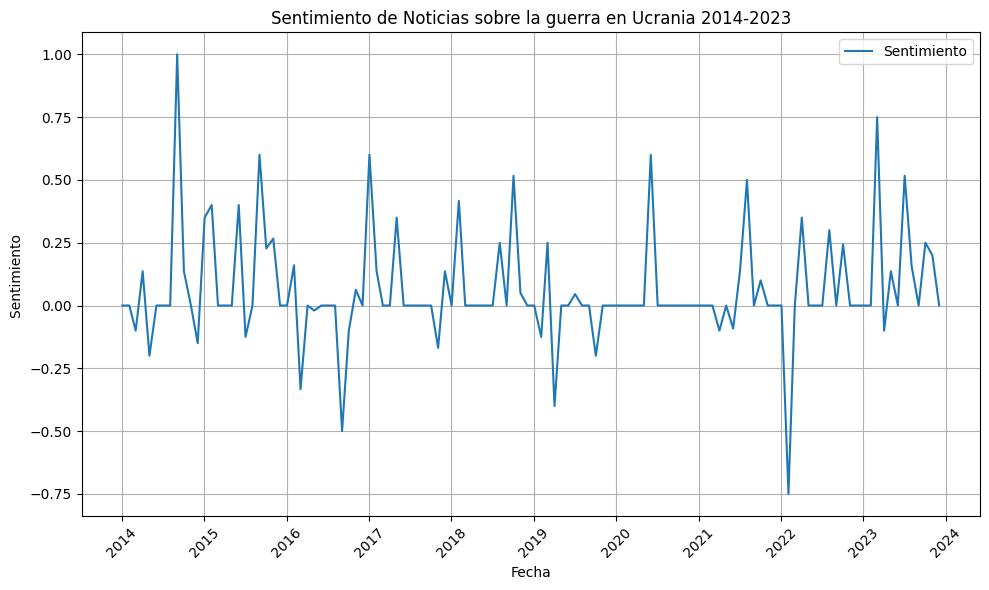

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(datasent['Date'], datasent['Sentiment'], label='Sentimiento')
plt.xlabel('Fecha')
plt.ylabel('Sentimiento ')
plt.title('Sentimiento de Noticias sobre la guerra en Ucrania 2014-2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
datasent.set_index('Date', inplace=True)
datasent = datasent.resample('D').ffill()

In [ ]:
datasent = datasent.reset_index()


In [ ]:
# Conversion date formato datetime y limpieza outlier
datasent['Date'] = pd.to_datetime(datasent['Date']).astype('datetime64[ns]')
datasent['Sentiment'] = pd.to_numeric(datasent['Sentiment'], errors='coerce')
datasent.dropna(subset=['Sentiment'], inplace=True)

## Fusion de Datos

In [ ]:
datac = pd.merge(weather_data, datag, on="Date", how="inner")
dataa = pd.merge(datac, datanrg, on="Date", how="inner")
datab = pd.merge(dataa, datasent, on="Date", how="inner")
data = datab.fillna(0)
print(data)


           Date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0    2014-01-03   6.6   2.7   9.3   0.0   0.0  188.0  11.9  44.6  1008.9   
1    2014-01-06   4.9   0.7   8.3   9.6   0.0  182.0  12.6  39.2  1011.2   
2    2014-01-07   9.1   7.4  11.6   1.6   0.0  202.0  14.4  36.0  1013.5   
3    2014-01-08   8.5   5.2  10.8   1.5   0.0  219.0  14.4  53.6  1015.8   
4    2014-01-09   8.2   4.2  12.2   1.0   0.0  198.0  16.2  59.8  1007.0   
...         ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2458 2023-09-25  14.4   8.5  21.1   0.0   0.0  135.0   9.9  25.9  1026.8   
2459 2023-09-26  17.1  11.3  23.6   0.0   0.0  118.0   9.4  24.1  1023.1   
2460 2023-09-27  18.9  13.4  25.8   0.0   0.0  140.0   8.1  20.4  1020.6   
2461 2023-09-28  18.7  13.5  25.7   0.0   0.0  181.0   9.7  20.4  1017.3   
2462 2023-09-29  18.0  13.7  22.4   0.0   0.0  201.0   9.8  25.9  1017.0   

       tsun  Price      Energy  Sentiment  
0     228.0   4.39  365603.000        0.0  

## Guardar datos


In [ ]:
data.to_csv('final_data_merge.csv', index=False)
files.download('final_data_merge.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## correlation


Price        1.000000
Date         0.187353
tmin         0.052683
tavg         0.047378
tmax         0.044097
snow         0.029643
tsun         0.022018
Sentiment    0.017779
pres        -0.002211
prcp        -0.011824
wspd        -0.032661
wdir        -0.051999
wpgt        -0.059790
Energy      -0.143340
Name: Price, dtype: float64


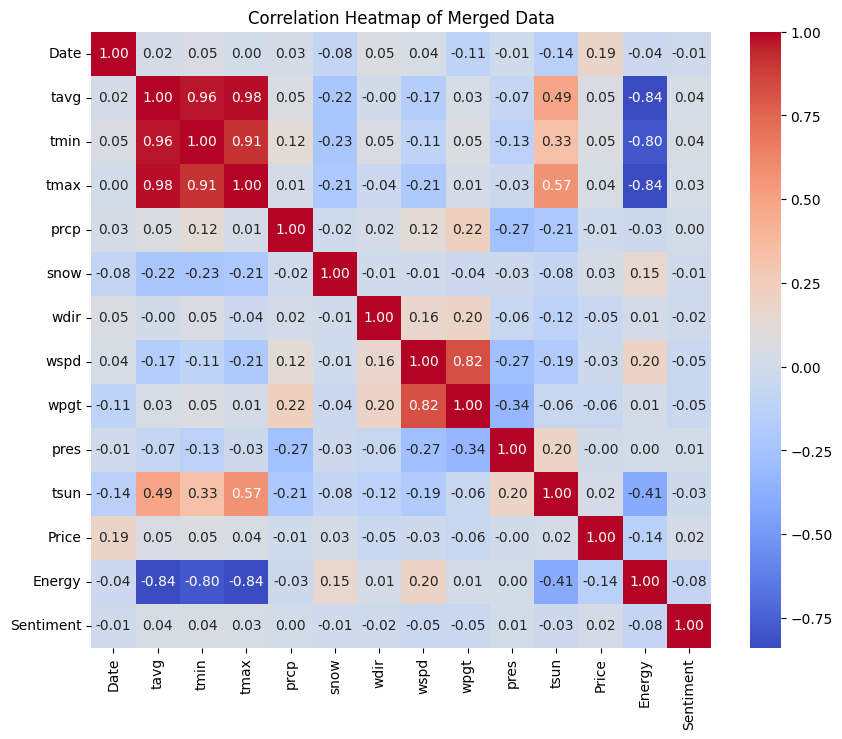

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = data.apply(pd.to_numeric, errors='coerce')

correlation = data.corr()['Price'].sort_values(ascending=False)
print(correlation)

correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Merged Data')
plt.show()


## model

In [ ]:
from google.colab import files

import pandas as pd
import io
uploaded = files.upload()

file_name = 'final_data_merge.csv'
data  = pd.read_csv(file_name)
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])

# Convert selected columns to numeric
data['Price'] = data['Price'].apply(pd.to_numeric, errors='coerce')


data = data.dropna()

Saving final_data_merge.csv to final_data_merge.csv


### Linear Regression, SVM, Random Forrest

In [ ]:
future_dates = pd.date_range(start=data['Date'].max() + timedelta(days=1), periods=15, freq='D')


In [ ]:
errors = []
future_dates = pd.date_range(start=data['Date'].max() + timedelta(days=1), periods=15, freq='D')
predictions_dict = {}

Linear Regression RMSE: 3.17


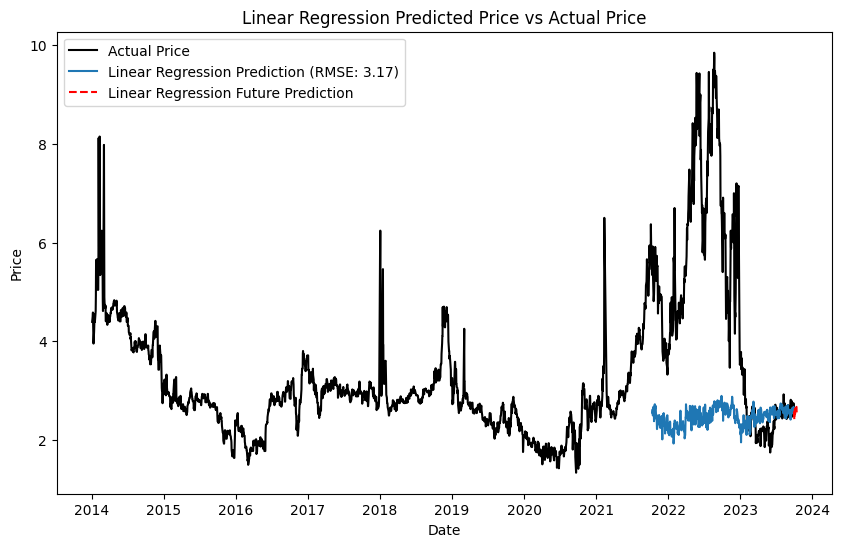

Support Vector Machine RMSE: 2.91


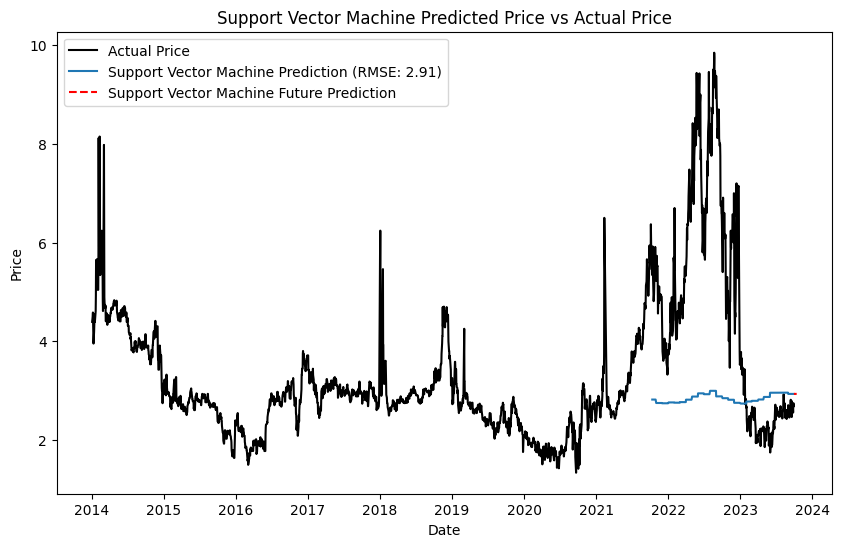

Random Forest RMSE: 2.46


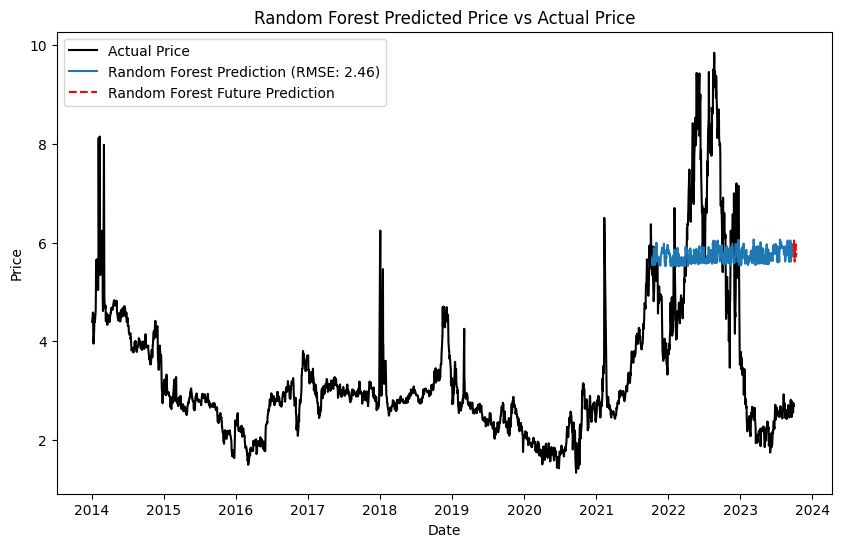

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.vector_ar.var_model import VAR

# Assuming 'data' is your DataFrame with columns: 'Date', 'Price', and other weather columns

# Assuming 'Date' column is in datetime format, if not convert it
data['Date'] = pd.to_datetime(data['Date'])

# Sort the DataFrame by 'Date' if not already sorted
data = data.sort_values('Date')

# Calculate the index to split the data for 80% train and 20% test
split_index = int(0.8 * len(data))

# Split data into train and test sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Extract features (weather columns) and target variable (Price) for train and test sets
X_train = train_data.drop(['Date', 'Price'], axis=1)
y_train = train_data['Price']
X_test = test_data.drop(['Date', 'Price'], axis=1)
y_test = test_data['Price']

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


# Train and predict with each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mse = mean_squared_error(y_test, test_predictions)
    mae = np.mean(np.abs(test_predictions - y_test))

    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': model_name,
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)
    print(f"{model_name} RMSE: {rmse:.2f}")

  # Predict 15 days into the future
    future_features = X_test.tail(15)  # Taking the last 15 days of test set as initial future features
    future_predictions = []
    model_predictions = []



    for _ in range(15):
        future_prediction = model.predict(future_features)[0]
        future_predictions.append(future_prediction)
        future_features = future_features.shift(-1)
        future_features.iloc[-1] = future_prediction  # Update the last row with the predicted value

    for i, date in enumerate(future_dates):
        if date not in predictions_dict:
            predictions_dict[date] = {}
        predictions_dict[date][model_name] = future_predictions[i]

    # Append date-model-prediction dictionaries to predictions list

    # Create DataFrame for future dates and predictions
    future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
     # Plotting the results for different models
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Price'], color='black', label='Actual Price')  # Real data in black
    plt.plot(test_data['Date'], test_predictions, label=f'{model_name} Prediction (RMSE: {rmse:.2f})')

    # Plotting future predictions with a different style/color
    plt.plot(future_data['Date'], future_data['Predicted Price'], linestyle='--', color='red', label=f'{model_name} Future Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{model_name} Predicted Price vs Actual Price')
    plt.legend()
    plt.show()


In [ ]:
predictions_dict

{Timestamp('2023-09-30 00:00:00', freq='D'): {'Linear Regression': 2.5383317501035663,
  'Support Vector Machine': 2.9287572791734773,
  'Random Forest': 5.6962637078907505},
 Timestamp('2023-10-01 00:00:00', freq='D'): {'Linear Regression': 2.5558199193704922,
  'Support Vector Machine': 2.9287510358590034,
  'Random Forest': 4.9340040041665905},
 Timestamp('2023-10-02 00:00:00', freq='D'): {'Linear Regression': 2.4077179671016165,
  'Support Vector Machine': 2.928737616890559,
  'Random Forest': 5.002803343970707},
 Timestamp('2023-10-03 00:00:00', freq='D'): {'Linear Regression': 2.536937766619971,
  'Support Vector Machine': 2.9287341782804592,
  'Random Forest': 5.20093228558477},
 Timestamp('2023-10-04 00:00:00', freq='D'): {'Linear Regression': 2.577364258734841,
  'Support Vector Machine': 2.928749157586431,
  'Random Forest': 5.0952738119404355},
 Timestamp('2023-10-05 00:00:00', freq='D'): {'Linear Regression': 2.6118028863354557,
  'Support Vector Machine': 2.928740209807242

In [ ]:
predictions_df = pd.DataFrame(predictions_dict).T.reset_index().rename(columns={'index': 'Date'})

In [ ]:
predictions_df

,Date,Linear Regression,Support Vector Machine,Random Forest,Gradient Boosting
0,2023-09-30,2.538332,2.928757,5.696264,5.696264
1,2023-10-01,2.555820,2.928751,4.934004,4.934004
2,2023-10-02,2.407718,2.928738,5.002803,5.002803
3,2023-10-03,2.536938,2.928734,5.200932,5.200932
4,2023-10-04,2.577364,2.928749,5.095274,5.095274
5,2023-10-05,2.611803,2.928740,5.200932,5.200932
6,2023-10-06,2.527452,2.928730,5.095274,5.095274
7,2023-10-07,2.607013,2.928728,5.200932,5.200932
8,2023-10-08,2.640079,2.928729,5.095274,5.095274
9,2023-10-09,2.626120,2.928721,5.200932,5.200932


### Gradient Boosting

Gradient Boosting RMSE: 2.47


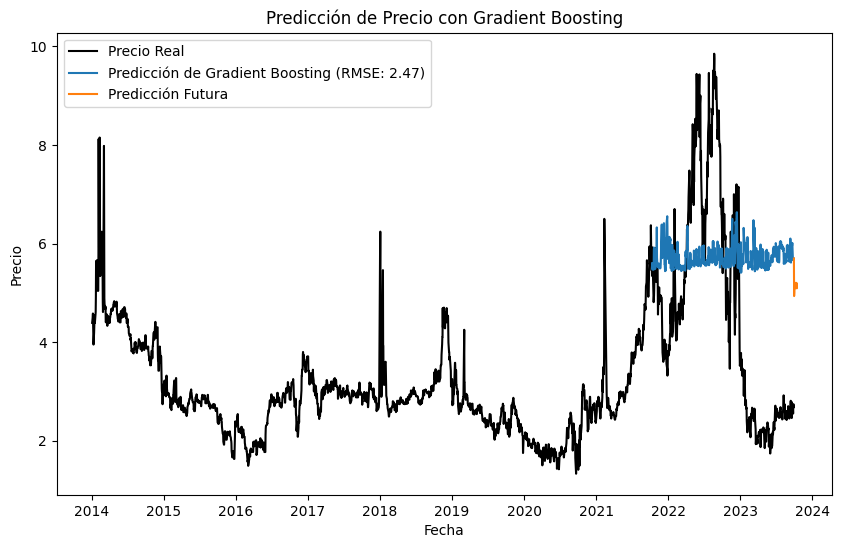

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def plot_with_gradient_boosting(data):
    # Asumiendo que 'data' tiene columnas: 'Date', 'Price', y otras columnas de características (variables exógenas)

    # Asegúrate de que la columna 'Date' esté en formato datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Ordenar el DataFrame por 'Date' si no está ordenado
    data = data.sort_values('Date')

    # Calcular el índice para dividir los datos en 80% de entrenamiento y 20% de prueba
    split_index = int(0.8 * len(data))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    # Extraer características (columnas relacionadas con el clima u otros) y la variable objetivo (Price) para conjuntos de entrenamiento y prueba
    X_train = train_data.drop(['Date', 'Price'], axis=1)
    y_train = train_data['Price']
    X_test = test_data.drop(['Date', 'Price'], axis=1)
    y_test = test_data['Price']

    # Inicializar el modelo GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model_name = "Gradient Boosting"
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    test_predictions = model.predict(X_test)
    #error
    error = np.sqrt(mean_squared_error(y_test, test_predictions))
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mse = mean_squared_error(y_test, test_predictions)
    mae = np.mean(np.abs(test_predictions - y_test))

    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': model_name,
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)
    print(f"Gradient Boosting RMSE: {error:.2f}")

    # Predecir 15 días en el futuro a partir del último dato real
    future_features = data.drop(['Date', 'Price'], axis=1).tail(1)  # Tomar el último día como características iniciales para predecir el futuro
    future_predictions = []

    for _ in range(15):
        future_prediction = model.predict(future_features)[0]
        future_predictions.append(future_prediction)
        future_features = future_features.shift(-1)
        future_features.iloc[-1] = future_prediction  # Actualizar la última fila con el valor predicho

    for i, date in enumerate(future_dates):
        predictions_dict[date][model_name] = future_predictions[i]


    # Crear un DataFrame para las fechas futuras y las predicciones
    future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Price'], color='black', label='Precio Real')  # Datos reales en negro
    plt.plot(test_data['Date'], test_predictions, label=f'Predicción de Gradient Boosting (RMSE: {error:.2f})')
    plt.plot(future_data['Date'], future_data['Predicted Price'], label='Predicción Futura')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Predicción de Precio con Gradient Boosting')
    plt.legend()
    plt.show()
plot_with_gradient_boosting(data)

### VARX

VARX RMSE: 3.15
         Date  Predicted Price
0  2023-09-30         2.370854
1  2023-10-01         2.632911
2  2023-10-02         2.632022
3  2023-10-03         2.632025
4  2023-10-04         2.632025
5  2023-10-05         2.632025
6  2023-10-06         2.632025
7  2023-10-07         2.632025
8  2023-10-08         2.632025
9  2023-10-09         2.632025
10 2023-10-10         2.632025
11 2023-10-11         2.632025
12 2023-10-12         2.632025
13 2023-10-13         2.632025
14 2023-10-14         2.632025


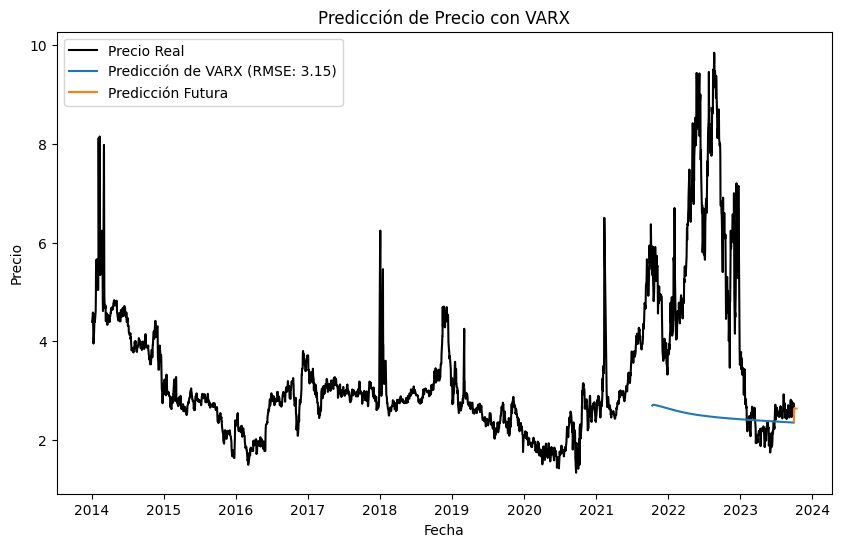

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

def plot_with_varx(data):
    # Asumiendo que 'data' tiene columnas: 'Date', 'Price' (variable objetivo) y otras columnas de características exógenas

    # Asegúrate de que la columna 'Date' esté en formato datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Ordenar el DataFrame por 'Date' si no está ordenado
    data = data.sort_values('Date')

    # Calcular el índice para dividir los datos en 80% de entrenamiento y 20% de prueba
    split_index = int(0.8 * len(data))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    # Variable objetivo: 'Price' para conjuntos de entrenamiento y prueba
    y_train = train_data['Price']
    y_test = test_data['Price']

    # Variables exógenas para conjuntos de entrenamiento y prueba
    exog_train = train_data.drop(['Date', 'Price'], axis=1)
    exog_test = test_data.drop(['Date', 'Price'], axis=1)

    # Combinar la variable objetivo y las variables exógenas para el conjunto de entrenamiento
    train_data_combined = pd.concat([y_train, exog_train], axis=1)

    # Inicializar y ajustar el modelo VARX
    model = VAR(train_data_combined)
    model_fitted = model.fit()

      # Realizar predicciones en el conjunto de prueba
    lag_order = model_fitted.k_ar
    test_data_combined = pd.concat([y_test, exog_test], axis=1)
    forecast_input = test_data_combined.values[-lag_order:]
    forecast = model_fitted.forecast(forecast_input, steps=len(y_test))

    # Extraer las predicciones y calcular el error RMSE
    test_predictions = forecast[:, 0]

    #error
    error = np.sqrt(mean_squared_error(y_test, test_predictions))
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    mse = mean_squared_error(y_test, test_predictions)
    mae = np.mean(np.abs(test_predictions - y_test))

    model_name = "VARX"
    # Create a dictionary for the current model's errors
    model_errors = {
        'Model': model_name,
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)

    print(f"VARX RMSE: {error:.2f}")

    # Predicciones futuras
    future_dates = pd.date_range(start=data['Date'].max() + timedelta(days=1), periods=15, freq='D')
    future_features = exog_test.tail(1).values  # Tomar el último día como características iniciales para predecir el futuro
    future_predictions = []

    for _ in range(15):
        forecast_input_future = np.concatenate((test_predictions[-lag_order:].reshape(1, -1), future_features.reshape(1, -1)), axis=1)
        future_forecast = model_fitted.forecast(forecast_input_future, steps=1)
        future_prediction = future_forecast[:, 0][0]
        future_predictions.append(future_prediction)
        future_features = np.roll(future_features, -1)
        future_features[-1] = future_prediction  # Actualizar la última entrada con el valor predicho

    for i, date in enumerate(future_dates):
        predictions_dict[date][model_name] = future_predictions[i]

    # Crear un DataFrame para las fechas futuras y las predicciones
    future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
    print(future_data)
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Price'], color='black', label='Precio Real')  # Datos reales en negro
    plt.plot(test_data['Date'], test_predictions, label=f'Predicción de VARX (RMSE: {error:.2f})')
    plt.plot(future_data['Date'], future_data['Predicted Price'], label='Predicción Futura')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Predicción de Precio con VARX')
    plt.legend()
    plt.show()
plot_with_varx(data)

In [ ]:
predictions_dict

{Timestamp('2023-09-30 00:00:00', freq='D'): {'Linear Regression': 2.5383317501035663,
  'Support Vector Machine': 2.9287572791734773,
  'Random Forest': 5.6962637078907505,
  'Gradient Boosting': 5.6962637078907505,
  'VARX': 2.3708536472957067,
  'LSTM': 5.9011000000000005,
  'DNN': 3.4763815},
 Timestamp('2023-10-01 00:00:00', freq='D'): {'Linear Regression': 2.5558199193704922,
  'Support Vector Machine': 2.9287510358590034,
  'Random Forest': 4.9340040041665905,
  'Gradient Boosting': 4.9340040041665905,
  'VARX': 2.632910754615265,
  'LSTM': 6.041300000000002,
  'DNN': 4.1289115},
 Timestamp('2023-10-02 00:00:00', freq='D'): {'Linear Regression': 2.4077179671016165,
  'Support Vector Machine': 2.928737616890559,
  'Random Forest': 5.002803343970707,
  'Gradient Boosting': 5.002803343970707,
  'VARX': 2.6320222324205393,
  'LSTM': 5.956100000000001,
  'DNN': 4.643159},
 Timestamp('2023-10-03 00:00:00', freq='D'): {'Linear Regression': 2.536937766619971,
  'Support Vector Machine':

### LSTM

Epoch 1/10
1957/1957 - 19s - loss: 0.0025 - 19s/epoch - 10ms/step
Epoch 2/10
1957/1957 - 9s - loss: 0.0014 - 9s/epoch - 5ms/step
Epoch 3/10
1957/1957 - 10s - loss: 0.0012 - 10s/epoch - 5ms/step
Epoch 4/10
1957/1957 - 10s - loss: 0.0011 - 10s/epoch - 5ms/step
Epoch 5/10
1957/1957 - 9s - loss: 9.5500e-04 - 9s/epoch - 4ms/step
Epoch 6/10
1957/1957 - 10s - loss: 8.1146e-04 - 10s/epoch - 5ms/step
Epoch 7/10
1957/1957 - 10s - loss: 8.9945e-04 - 10s/epoch - 5ms/step
Epoch 8/10
1957/1957 - 9s - loss: 7.8690e-04 - 9s/epoch - 4ms/step
Epoch 9/10
1957/1957 - 10s - loss: 7.5516e-04 - 10s/epoch - 5ms/step
Epoch 10/10
1957/1957 - 10s - loss: 7.7367e-04 - 10s/epoch - 5ms/step
1/1 [==============================] - 0s 19ms/step


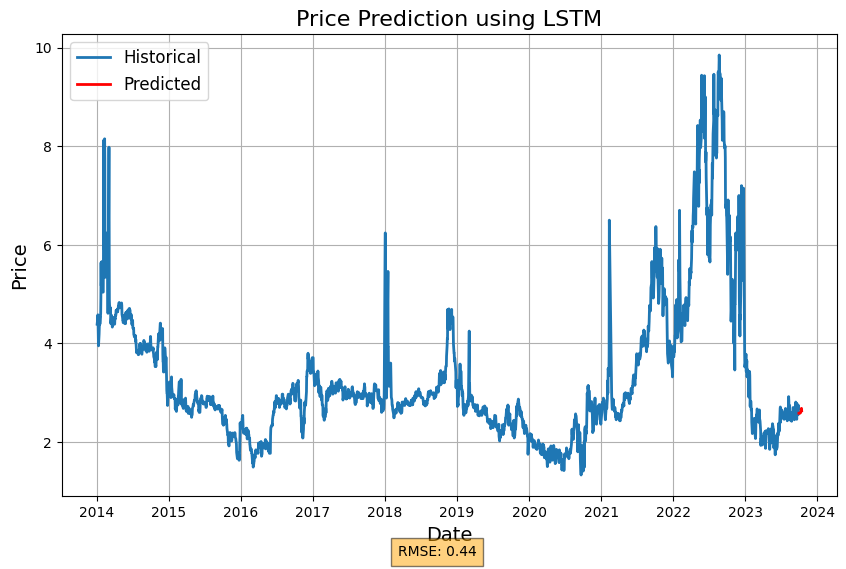

In [ ]:
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def predict_LSTM(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')

    price_scaler = MinMaxScaler(feature_range=(0, 1))
    price_scaled_data = price_scaler.fit_transform(data['Price'].values.reshape(-1,1))

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    scaled_data[:, 0] = price_scaled_data.flatten()

    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), :]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)
    X, y = create_dataset(scaled_data, 15)

    # Split data into train and test sets
    train_size = int(len(X) * 0.8)
    test_size = len(X) - train_size
    X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
    y_train, y_test = y[0:train_size], y[train_size:len(y)]

    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model for more epochs
    model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=2)

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions
    train_predict = price_scaler.inverse_transform(train_predict)
    y_train = price_scaler.inverse_transform([y_train])
    test_predict = price_scaler.inverse_transform(test_predict)
    y_test = price_scaler.inverse_transform([y_test])

        # Generate future dates

    # Initialize future_prices list
    future_prices = []

    # Predict future prices
    for i in range(15, 0, -1):
        future_price = model.predict(scaled_data[-i:].reshape(1, i, scaled_data.shape[1]))
        future_price = price_scaler.inverse_transform(future_price)
        future_prices.append(future_price[0][0])
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
    rmse_label = 'RMSE: {:.2f}'.format(rmse)

    #error
    rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
    mse = mean_squared_error(y_test[0], test_predict[:,0])
    mae = np.mean(np.abs(test_predict[:,0] - y_test[0]))

    model_name = "LSTM"
    model_errors = {
        'Model': model_name,
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

    # Append the dictionary to the list
    errors.append(model_errors)

    for i, date in enumerate(future_dates):
        predictions_dict[date][model_name] = future_predictions[i]

    # Plot the results with better quality
    plt.figure(figsize=(10,6))
    plt.plot(data.index, data['Price'], label='Historical', linewidth=2)
    plt.plot(future_dates, future_prices, label='Predicted', linewidth=2, color='red')
    plt.title('Price Prediction using LSTM', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.figtext(0.5, 0.01, rmse_label, ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    plt.ylabel('Price', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()
predict_LSTM(data)

### DNN

Epoch 1/50
77/77 [==============================] - 1s 3ms/step - loss: 0.0301
Epoch 2/50
77/77 [==============================] - 0s 4ms/step - loss: 0.0246
Epoch 3/50
77/77 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 4/50
77/77 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 5/50
77/77 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 6/50
77/77 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 7/50
77/77 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 8/50
77/77 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 9/50
77/77 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 10/50
77/77 [==============================] - 0s 4ms/step - loss: 0.0139
Epoch 11/50
77/77 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 12/50
77/77 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 13/50
77/77 [==============================

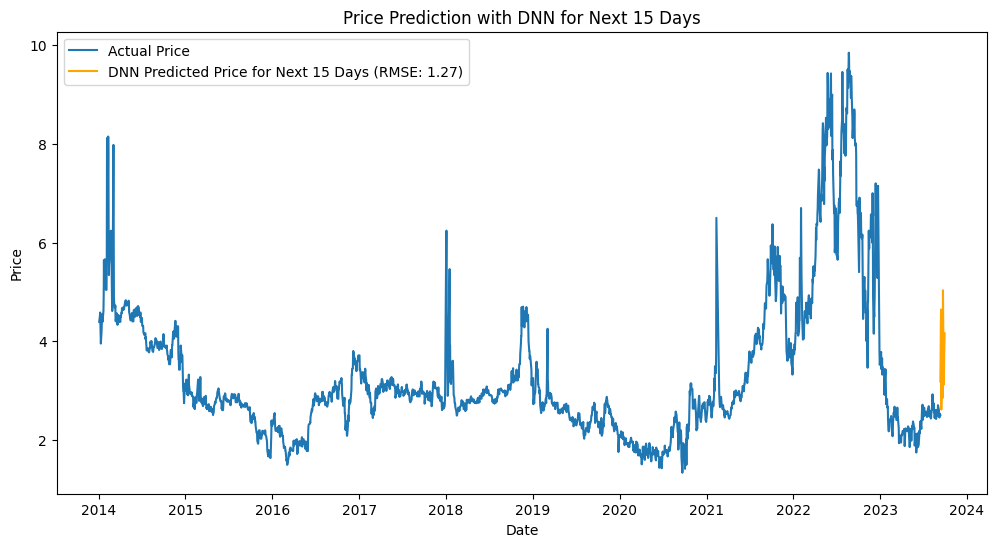

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Array to store model errors
errors = []

def prepare_dnn_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')

    features = data.drop(['Date', 'Price'], axis=1).values
    target = data['Price'].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)
    target_scaled = scaler.fit_transform(target)

    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = features_scaled[:-15], features_scaled[-15:], target_scaled[:-15], target_scaled[-15:]

    return X_train, X_test, y_train, y_test, scaler, data['Date'], data['Price']

def plot_with_dnn(data):
    X_train, X_test, y_train, y_test, scaler, dates, prices = prepare_dnn_data(data)

    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Predicting the next 15 days
    future_predictions = model.predict(X_test)
    future_predictions = scaler.inverse_transform(future_predictions).flatten()

    # Inverse transforming the test prices for comparison
    y_test = scaler.inverse_transform(y_test).flatten()

    # Calculating RMSE for the test predictions
    error = np.sqrt(mean_squared_error(y_test, future_predictions))
    print(f"DNN RMSE for the next 15 days: {error:.2f}")

    # Storing model errors
    model_name = "DNN"
    model_errors = {
        'Model': model_name,
        'RMSE': error,
        'MSE': mean_squared_error(y_test, future_predictions),
        'MAE': np.mean(np.abs(future_predictions - y_test))
    }
    errors.append(model_errors)

    for i, date in enumerate(future_dates):
        predictions_dict[date][model_name] = future_predictions[i]


    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(dates[:-14], prices[:-14], label='Actual Price')
    plt.plot(dates[-15:], future_predictions, color='orange', label=f'DNN Predicted Price for Next 15 Days (RMSE: {error:.2f})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Price Prediction with DNN for Next 15 Days')
    plt.legend()
    plt.show()

# Usage
plot_with_dnn(data)


### prophet

In [ ]:
import io, os, sys, setuptools, tokenize
!pip install convertdate
!pip install lunarcalendar
!pip install pystan==2.19.1.1
!pip install holidays==0.10.3  # Specify a compatible version of holidays
!pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 755.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=74bf5317b8550dee679356fc94a5e08e4dd08d2a355191808263f1e4f80d4c59
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built pymeeus
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 66.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61976193 sha256=67d7f3c842d6dd1f16a54131b370ae9e40fc88239f7a7c31c264ad2d2159f854
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan
     ━━━━

In [ ]:
pro_df = data.copy()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

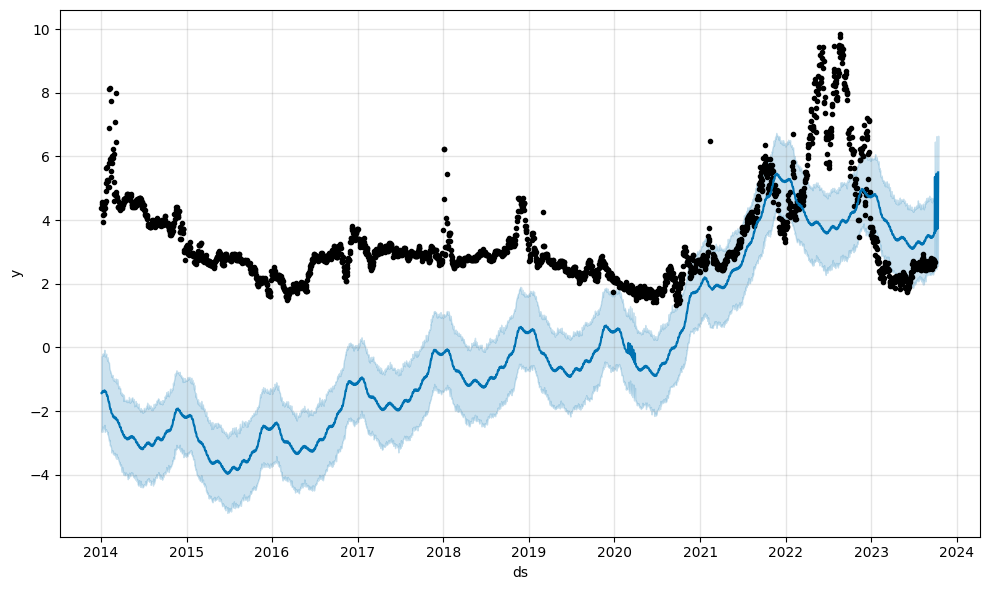

In [ ]:
import pandas as pd
from fbprophet import Prophet

pro_df = pro_df.fillna(0)

pro_df = pro_df.rename(columns={'Date': 'ds', 'Price': 'y'})
pro_df.reset_index(drop=True, inplace=True)
model = Prophet()

regressor_columns = [col for col in pro_df.columns if col not in ['ds', 'y']]
for col in regressor_columns:
    model.add_regressor(col)

model.fit(pro_df)
future = model.make_future_dataframe(periods=15)
for col in regressor_columns:
    future[col] = pro_df[col].iloc[-1]
future.reset_index(drop=True, inplace=True)

forecast = model.predict(future)

fig = model.plot(forecast)

forecasted_price = forecast['yhat'].tail(15)

In [ ]:
future

,ds,index,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Energy,Sentiment
0,2014-01-03,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
1,2014-01-06,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
2,2014-01-07,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
3,2014-01-08,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
4,2014-01-09,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2023-10-10,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
2474,2023-10-11,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
2475,2023-10-12,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0
2476,2023-10-13,2462,18.0,13.7,22.4,0.0,0.0,201.0,9.8,25.9,1017.0,0.0,139134.913,0.0


/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


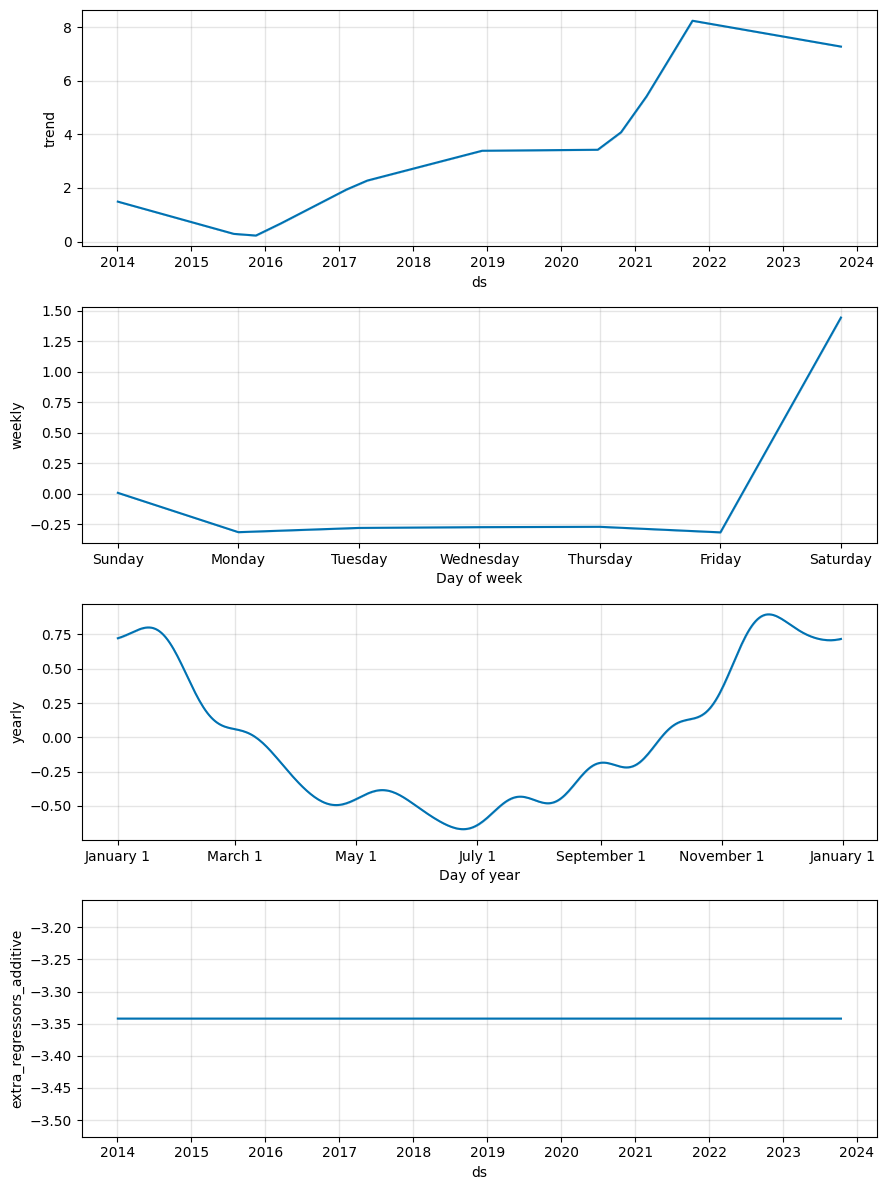

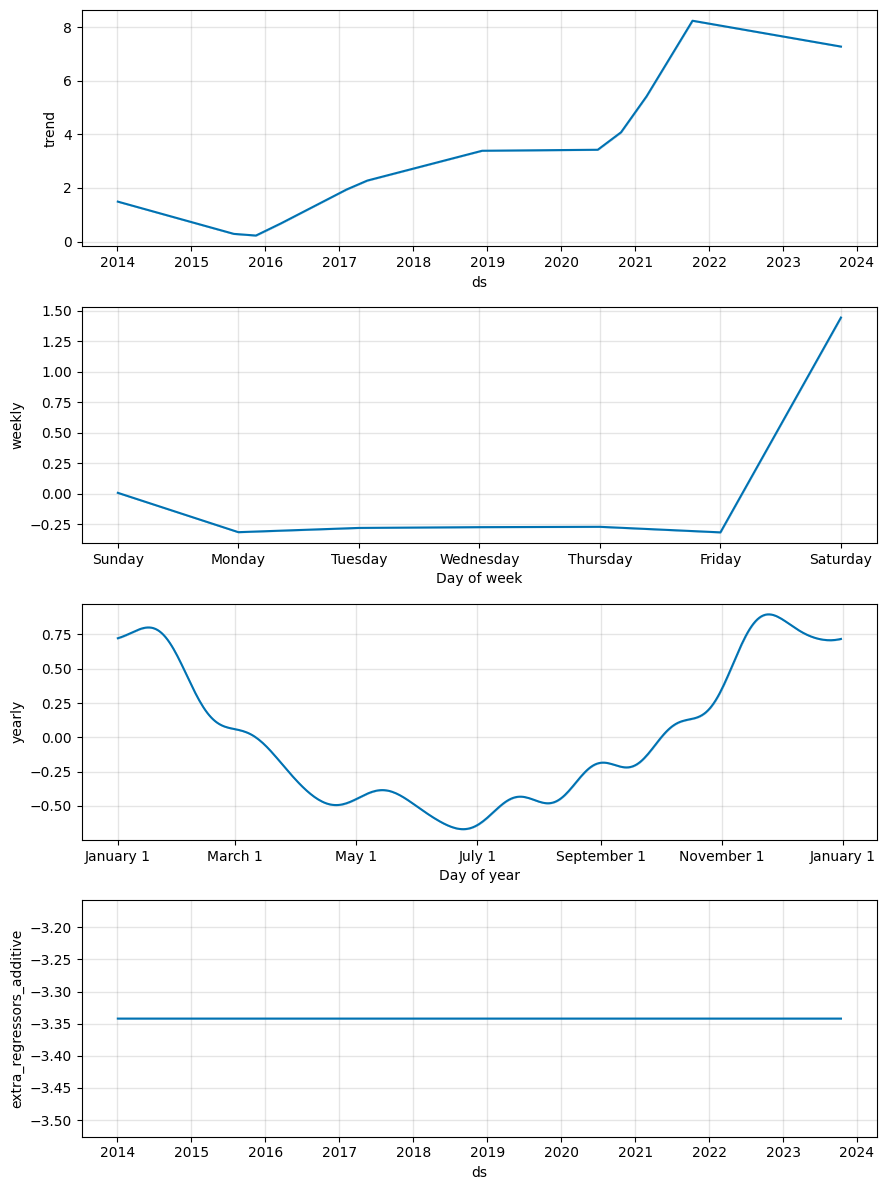

In [ ]:
model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
plot_components_plotly(model, forecast)

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
cmp_df = forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(pro_df.set_index('ds'))


In [ ]:
def plot_price_forecast(df,start_date, end_date):
    """
    This function filters the dataframe for the specified date range and
    plots the actual and forecast data.

    Assumption:
    - The dataframe has to be indexed on a Datetime column
    This makes the filtering very easy in pandas using df.loc
    """
    cmp_df = df.loc[start_date:end_date]
    plt.figure(figsize=(17,8))
    plt.plot(cmp_df['yhat'])
    plt.plot(cmp_df['y'])
    plt.legend()
    plt.show()

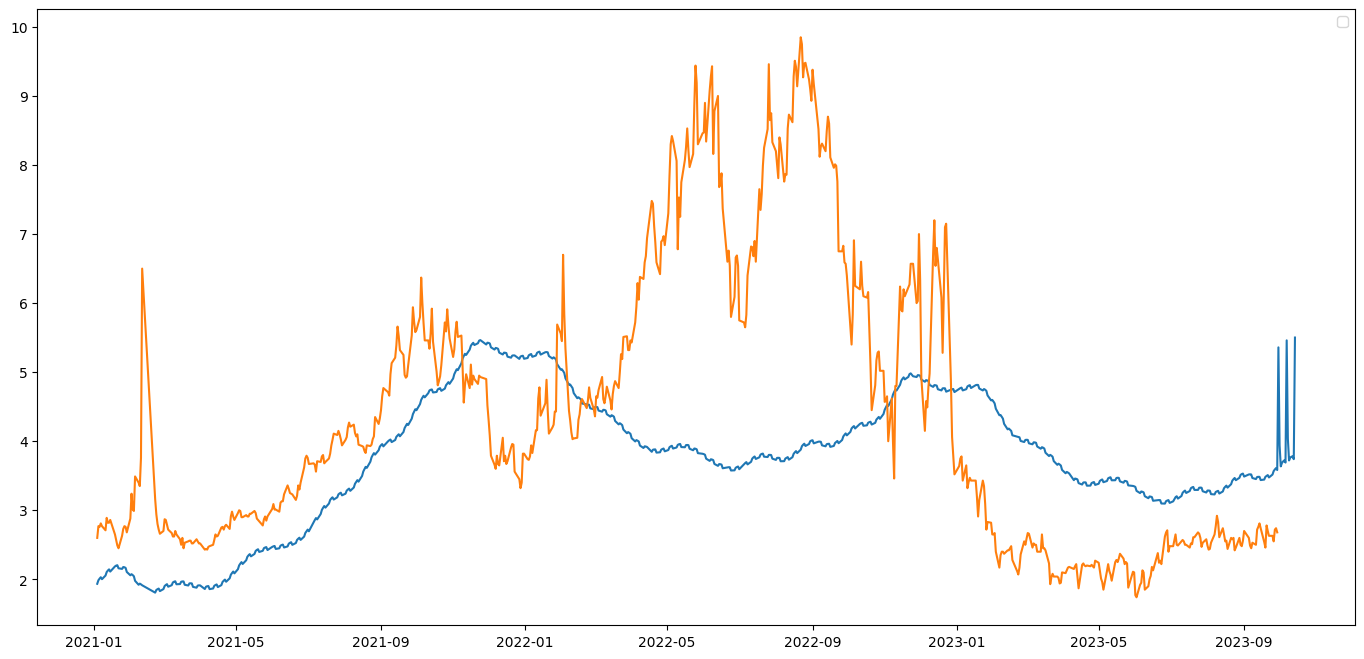

In [ ]:
plot_price_forecast(cmp_df,'2021-01-01','2024-01-01')

In [ ]:
future = model.make_future_dataframe(periods=15)
future = pd.merge(future, pro_df, on="ds", how="left")
future = future.fillna(0)
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



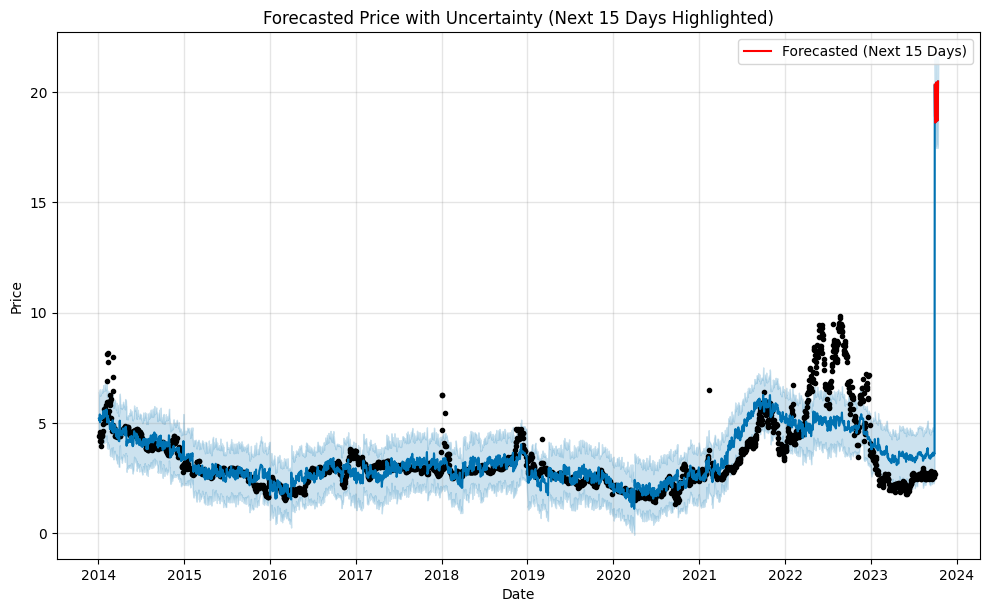

In [ ]:
fig = model.plot(forecast, xlabel='Date', ylabel='Price', figsize=(10, 6))
plt.title('Forecasted Price with Uncertainty (Next 15 Days Highlighted)')
future_dates = forecast['ds'].tail(15)
future_forecast = forecast['yhat'].tail(15)

plt.plot(future_dates, future_forecast, color='red', label='Forecasted (Next 15 Days)')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

import numpy as np
common_dates = forecast['ds'].isin(pro_df['ds'])
trimmed_forecast = forecast[common_dates]

mse_prophet = mean_squared_error(pro_df['y'], trimmed_forecast['yhat'])
rmse_prophet = np.sqrt(mse_prophet)
mae_prophet = np.mean(np.abs(trimmed_forecast['yhat'] - pro_df['y']))

print(f"Mean Squared Error (MSE): {mse_prophet:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet:.2f}")
print(f"Mean Absolute Error (MAE): {mae_prophet:.2f}")

model_name = "Prophet"
model_errors = {
    'Model': model_name,
    'RMSE': rmse_prophet,
    'MSE': mse_prophet,
    'MAE': mae_prophet
}
errors.append(model_errors)
for i, date in enumerate(future_dates):
    predictions_dict[date][model_name] = future_forecast.values[i]


Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.92
Mean Absolute Error (MAE): 0.59


### ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
arima_df = data.copy()

In [ ]:
 def test_stationarity(ts):

    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts['Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

<ipython-input-103-6ff49e2ede52>:3: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')

<ipython-input-103-6ff49e2ede52>:4: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')



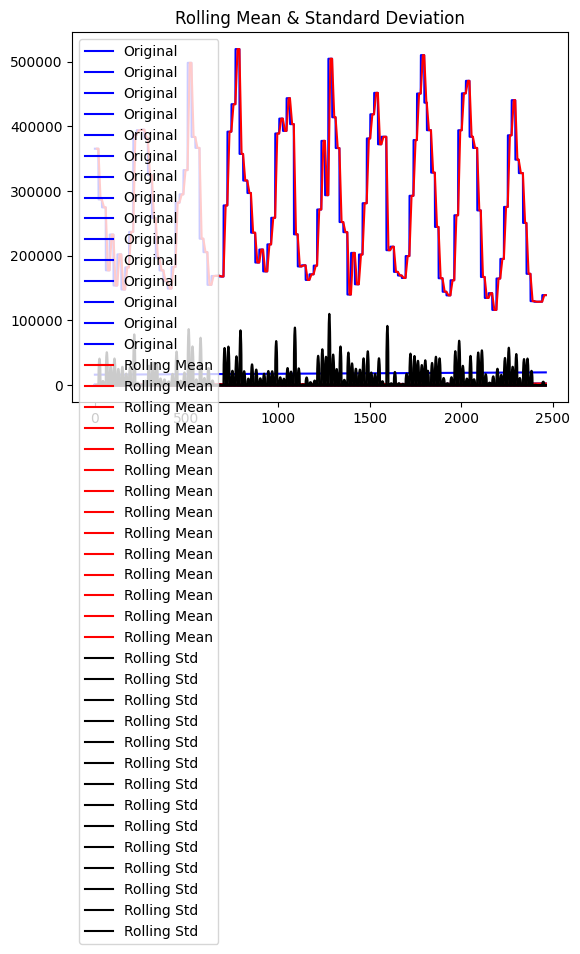

Results of Dickey-Fuller Test:
Test Statistic                   -3.371651
p-value                           0.011964
#Lags Used                       25.000000
Number of Observations Used    2437.000000
Critical Value (1%)              -3.433036
Critical Value (5%)              -2.862727
Critical Value (10%)             -2.567402
dtype: float64


In [ ]:
test_stationarity(arima_df)

p-value > 0.05 estacionalidad no hace. falt diferenciacion

In [ ]:
data_diff = arima_df['Price'].diff().dropna()


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_diff)
test_statistic = result[0]
p_value = result[1]
print(f'Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

Test Statistic: -11.448212160317905
p-value: 5.9462407528402095e-21


In [ ]:
d = 1

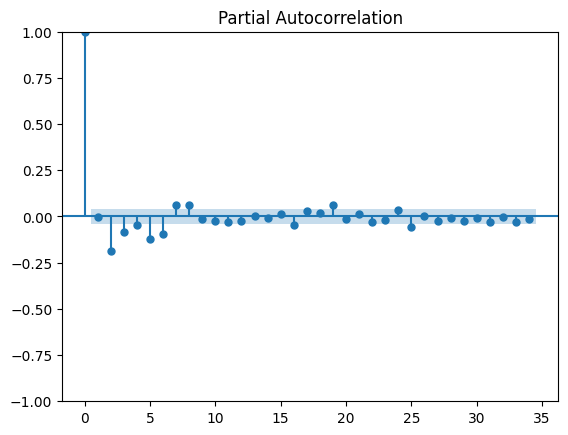

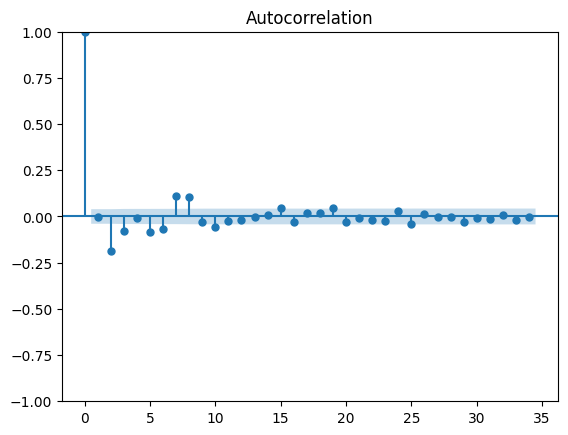

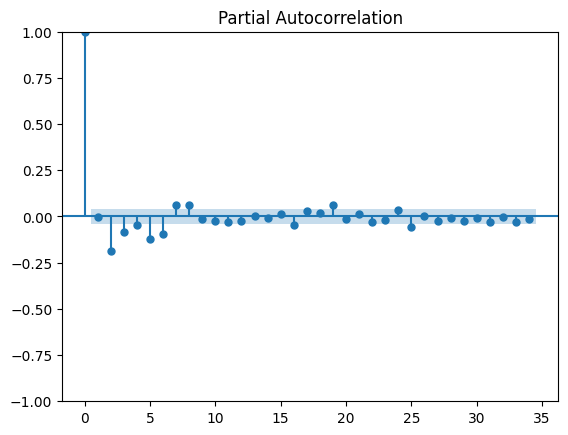

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data_diff )
plot_pacf(data_diff)

In [ ]:
import numpy as np

# Implementing own function to create ACF plot
def get_acf_plot(ts):
    #calling acf function from stattools
    y = ts
    lag_acf = acf(y, nlags=500)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')

def get_pacf_plot(ts):
    #calling pacf function from stattools
    y = ts
    lag_pacf = pacf(y, nlags=50)
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker="o")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')


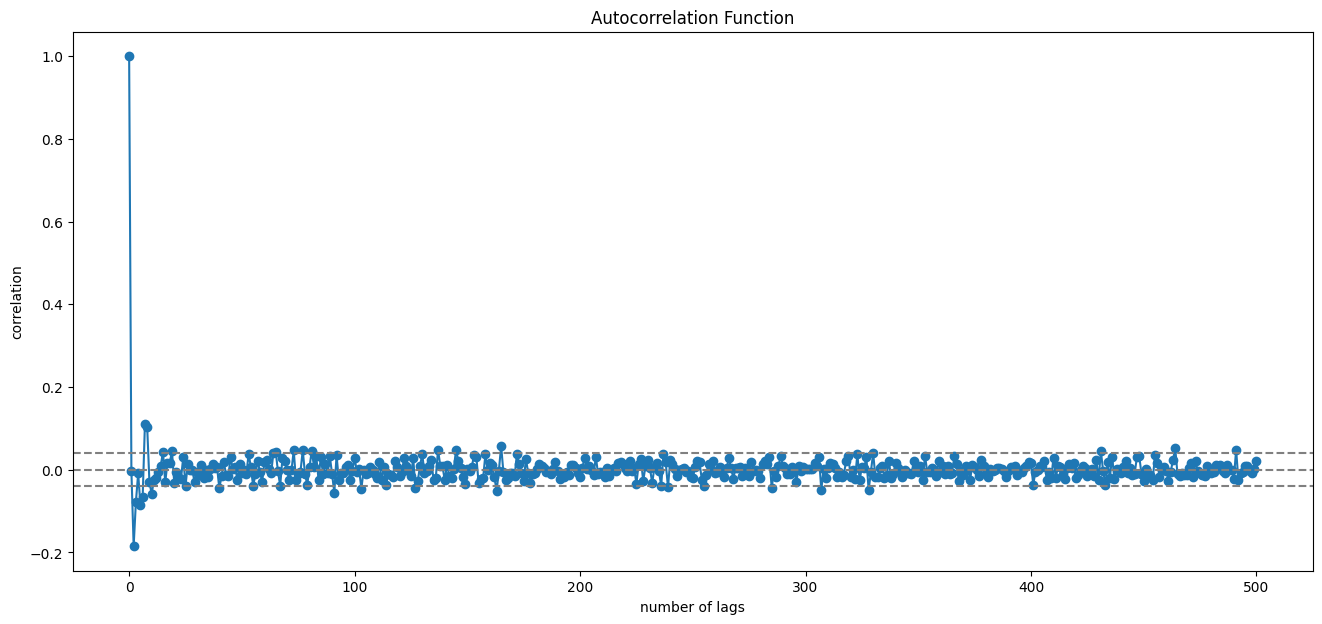

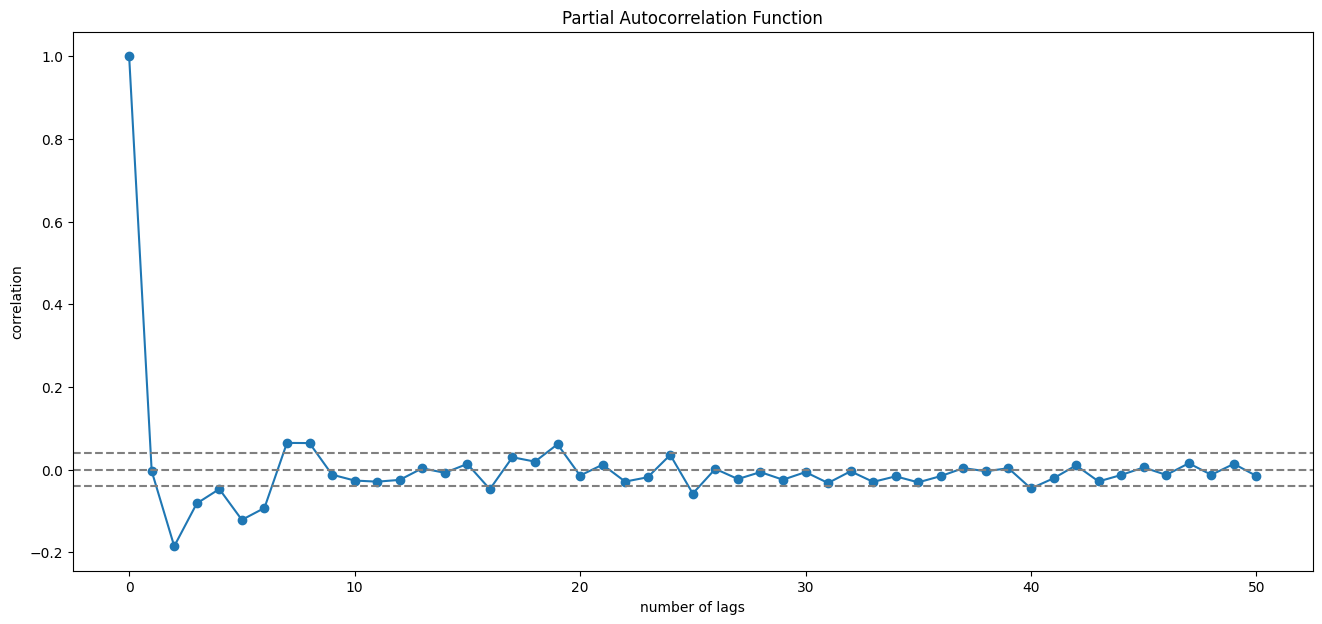

In [ ]:
get_acf_plot(data_diff)
get_pacf_plot(data_diff)

In [ ]:
q=3
p=2
d=1

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'data' contains your historical Price and weather data in a DataFrame with 'Date' column

# Define SARIMA parameters
order = (p,d,q)  # Define the (p, d, q) order
seasonal_order = (1, 1, 1, 12)  # Define seasonal order for yearly seasonality

# Extract endogenous (Price) and exogenous (weather) variables
endog = data['Price']
exog = data.drop(['Date', 'Price'], axis=1)  # Assuming other columns are weather variables

# Fit SARIMAX model with exogenous variables
model = SARIMAX(endog=endog, exog=exog, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast for the next 15 days
forecast = results.get_forecast(steps=15, exog=exog.tail(15))

# Extract forecasted values
forecasted_values = forecast.predicted_mean.values

# Assuming 'actual_data' contains the actual Price values for the forecasted period
actual_data = data['Price'].tail(15).values  # Extract actual Price values for the forecasted period

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_data, forecasted_values))
mae = mean_absolute_error(actual_data, forecasted_values)
mse = mean_squared_error(actual_data, forecasted_values)



print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

model_name = "ARIMA"
# Create a dictionary for the current model's errors
model_errors = {
    'Model': model_name,
    'RMSE': rmse,
    'MSE': mse,
    'MAE': mae
}

for i, date in reversed(list(enumerate(future_dates, 1))):
    predictions_dict[date][model_name] = forecasted_values[-i]
errors.append(model_errors)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE: 0.13
MAE: 0.11


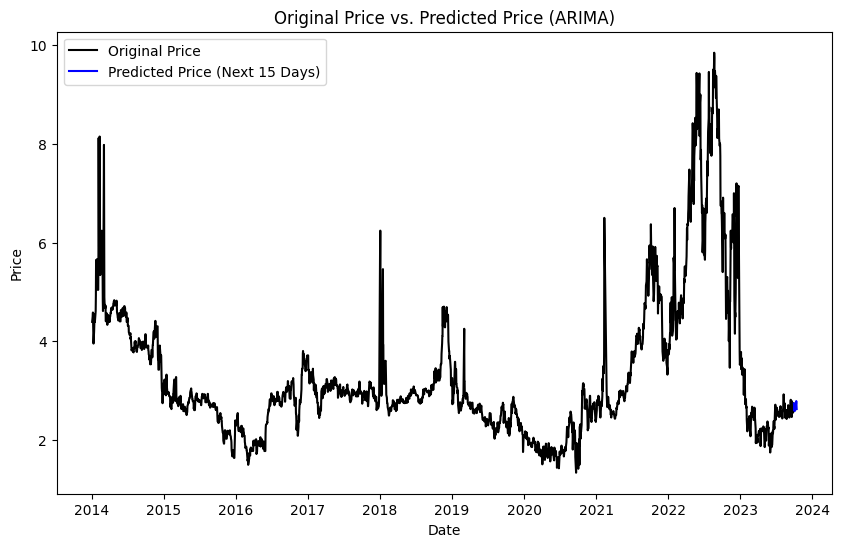

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' contains your historical Price and weather data in a DataFrame with 'Date' column

# Plot original data and forecasted values
plt.figure(figsize=(10, 6))

# Plot original Price data
plt.plot(data['Date'], data['Price'], label='Original Price', color='black')


# Predicted dates for the next 15 days
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=15, freq='D')  # Start from the day after the last available date
# Plot SARIMA predicted values for the next 15 days
plt.plot(future_dates, forecasted_values[:15], label='Predicted Price (Next 15 Days)', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original Price vs. Predicted Price (ARIMA)')
plt.legend()
plt.show()


## Comparison

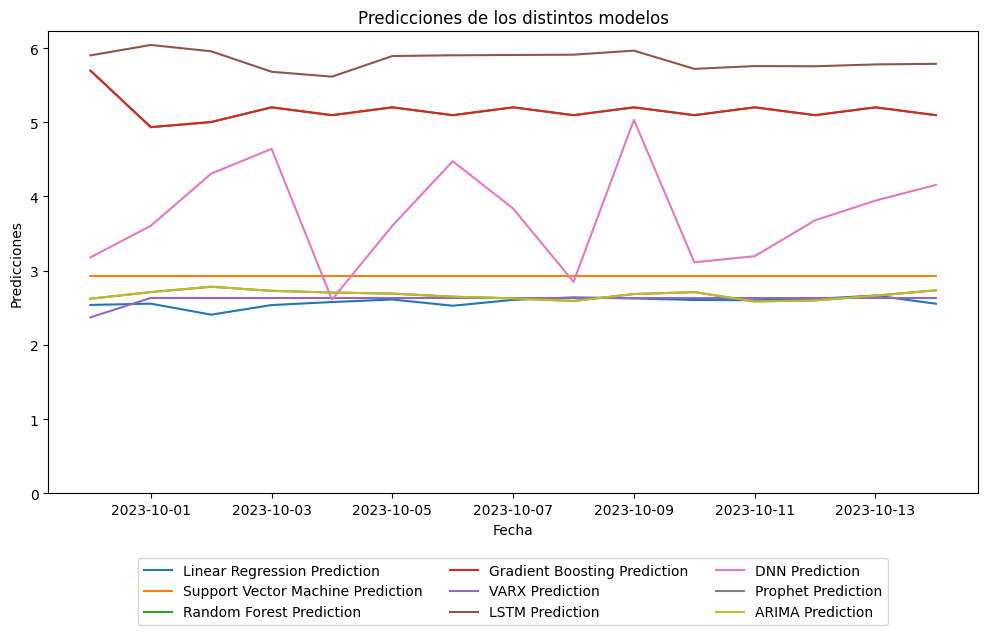

In [ ]:
predictions_df = pd.DataFrame(predictions_dict).T.reset_index().rename(columns={'index': 'Date'})

import matplotlib.pyplot as plt

# Assuming predictions_df is available with columns Date, Model1, Model2, ..., ModelN

# Plotting the predictions for different models dynamically
plt.figure(figsize=(12, 6))
for column in predictions_df.columns[1:]:  # Exclude 'Date' column
    plt.plot(predictions_df['Date'], predictions_df[column], label=f'{column} Prediction')

plt.ylim(bottom=0)
plt.xlabel('Fecha')
plt.ylabel('Predicciones')
plt.title('Predicciones de los distintos modelos')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)  # Place legend below the plot
plt.show()


In [ ]:
predictions_df.to_csv('predictions.csv', index=False)
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

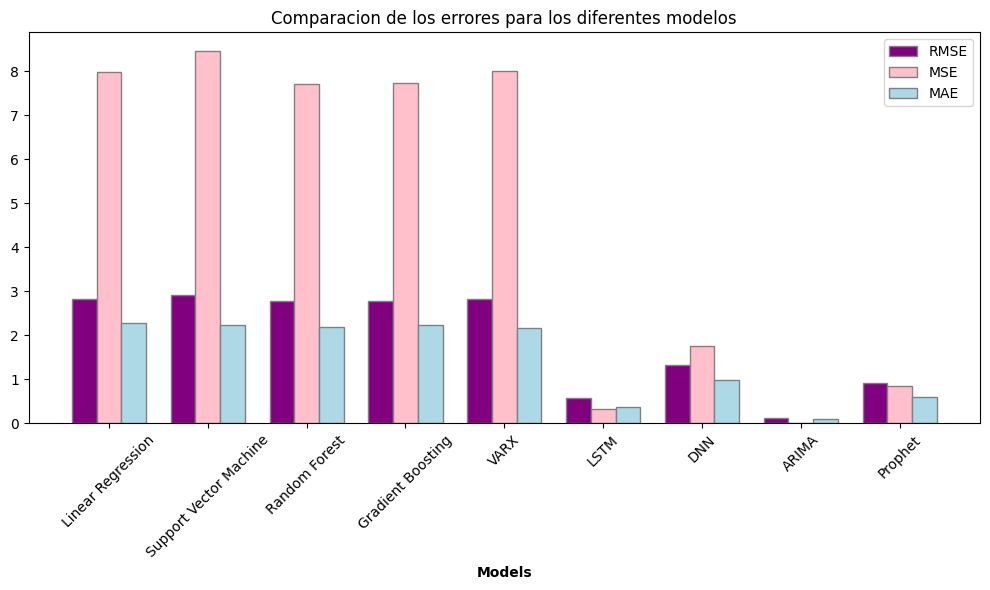

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have the 'errors_df' DataFrame with errors for each model
errors_df = pd.DataFrame(errors)


# Assuming you already have the 'errors_df' DataFrame with errors for each model

# Set the model names as the legend labels
models = errors_df['Model']

# Set the error values for each type of error
rmse = errors_df['RMSE']
mse = errors_df['MSE']
mae = errors_df['MAE']

# Set the positions of the bars on the x-axis
bar_positions = range(len(models))

# Set the width of the bars
bar_width = 0.25

# Plotting the bar chart
plt.figure(figsize=(10, 6))

plt.bar(bar_positions, rmse, color='purple', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar([pos + bar_width for pos in bar_positions], mse, color='pink', width=bar_width, edgecolor='grey', label='MSE')
plt.bar([pos + 2 * bar_width for pos in bar_positions], mae, color='lightblue', width=bar_width, edgecolor='grey', label='MAE')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([pos + bar_width for pos in bar_positions], models, rotation=45)

# Create legend
plt.legend()

# Show the plot
plt.title('Comparacion de los errores para los diferentes modelos')
plt.tight_layout()
plt.show()
